# Cyclistic: Google Capstone Project

## Introdution

The bike share analysis case study presented here and brings the real world scenario of the nature of bike riders, i.e.Annual member riders and non-member Casual riders in Chicago. Data for this analysis has been provided by Motivate International Inc. for 692 stations across Chicago and is a part of Course work of Google Data Analytics Certificate This case study is given by Google through E-learning cousera.

## 1. Ask

### Key Tasks

1. Consider key stakeholders:
    - The key stake holders are Lily Moreno (Director and Manager), Cyclistic executive members and marketing        analytics team.

2. Identify the buisness task:
    - The main goal of this work is to ensure design marketing strategies that would convert casual riders          into annual members by analyzing their wages.
    - Therefore, the focus will be centered on the nature of bike riders for a period of 18 months. 
 

## 2. Prepare

The data was available to be downloaded from the official site of Kaggle. under the licence agreement and data-privacy issues prohibits us from using the rider's personally identifiable information. This data was used as i created a nootbook. I will be using Python programming language to access and analyze the data. The data provided here is a second party data and is reliable because it comes from the source that has experiences in bike traffic analysis. On the other hand, the data does not seem to be Sampling biased because it covers almost all the region in Chicago.

The Data from 01-01-2020 to 31-06-2021

### Key Tasks

1. Download data and store it appropriately.
2. Identify how it’s organized:
    - It's organized as a proper dataset
3. Identify the bias and credibility:
    - No issues with bias in this Dataset

In [262]:
## Loading the necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [263]:
## Loading the dataset
df = pd.read_csv("C:/Users/al-khateb/Desktop/Cyclic Capstone Project/final_tripdata.csv")

In [264]:
## Get a look at the data set
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5515094 entries, 0 to 5515093
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  day_week_start      float64
 14  duration            float64
 15  distance            float64
dtypes: float64(7), object(9)
memory usage: 673.2+ MB


In [266]:
df.isna().sum()

ride_id                    0
rideable_type              1
started_at                 1
ended_at                   1
start_station_name    282069
start_station_id      282695
end_station_name      315999
end_station_id        316460
start_lat                  1
start_lng                  1
end_lat                    1
end_lng                    1
member_casual              1
day_week_start             1
duration                   1
distance                   1
dtype: int64

## 3. Data Cleaning

The stage is to clean the data and make it availble for analyses to get our recommendations at the act stages.

In [267]:
## There are some columns there is no need for them 
df.drop(["start_lat","start_lng","end_lat","end_lng"],axis = 1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,member,4.0,903.0,19670.18
...,...,...,...,...,...,...,...,...,...,...,...,...
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,member,5.0,3011.0,46660.08
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,member,2.0,7291.0,8525.92
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,member,4.0,7055.0,63716.35
5515092,FFFFFF0C829D3E7A,electric_bike,2021-05-03 17:04:08,2021-05-03 17:46:11,Clark St & Lake St,KA1503000012,Harper Ave & 59th St,KA1503000070,member,2.0,4203.0,105891.78


In [268]:
## The duration column has negative values which is error
(df["duration"]<=0).sum()

11306

In [269]:
## Delete the raws that contain negative values in the duratoin column
df.drop(df.index[df["duration"]<=0],inplace = True)

In [270]:
## The distance column has negative values which is error
(df["distance"]<=0).sum()

429308

In [271]:
## Delete the raws that contain negative values in the distance column
df.drop(df.index[df["distance"]<=0],inplace = True)

In [272]:
## Delete the null values in the dataset
df.dropna(inplace= True)

In [273]:
## Check for duplicates
df.duplicated().sum()
## No duplicated values

0

In [274]:
df["day_week_start"].unique()

array([4., 3., 7., 1., 5., 6., 2.])

In [275]:
## Add a column called day_week_start_name to change the number of the days to names
day_dict= {1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}
df["day_week_start_name"] = df["day_week_start"].apply(lambda y :day_dict[y])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,day_week_start_name
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53,Wednesday
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48,Tuesday
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25,Saturday
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42,Saturday
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515088,FFFFFB64C697B86A,docked_bike,2020-10-07 16:10:01,2020-10-07 16:45:28,Lake Shore Dr & Wellington Ave,157,Ashland Ave & Division St,210,41.936688,-87.636829,41.903450,-87.667747,member,4.0,3527.0,45394.79,Wednesday
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,41.894503,-87.617854,41.857499,-87.646277,member,5.0,3011.0,46660.08,Thursday
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,41.953393,-87.732002,41.961080,-87.735690,member,2.0,7291.0,8525.92,Monday
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,41.977997,-87.668047,41.926277,-87.630834,member,4.0,7055.0,63716.35,Wednesday


In [276]:
df.isna().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
day_week_start         0
duration               0
distance               0
day_week_start_name    0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4685565 entries, 0 to 5515092
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ride_id              object 
 1   rideable_type        object 
 2   started_at           object 
 3   ended_at             object 
 4   start_station_name   object 
 5   start_station_id     object 
 6   end_station_name     object 
 7   end_station_id       object 
 8   start_lat            float64
 9   start_lng            float64
 10  end_lat              float64
 11  end_lng              float64
 12  member_casual        object 
 13  day_week_start       float64
 14  duration             float64
 15  distance             float64
 16  day_week_start_name  object 
dtypes: float64(7), object(10)
memory usage: 643.5+ MB


## 3. Process

### Key Tasks

1. Check the data for errors:
    - Data Has been cleaned from the above code
    - No duplicates where found,remove negative values from a non-negative coulmn and remove NaN values and rows from the data
2. Choose your tools:
    - Python
3. Document the cleaning process.
    - Did it with every code



In [278]:
df["started_at"]= pd.to_datetime(df["started_at"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4685565 entries, 0 to 5515092
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             object        
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  day_week_start       float64       
 14  duration             float64       
 15  distance             float64       
 16  day_week_start_name  object        
dtypes: datetime64[ns](1), float64(7), object(9)
memory usage: 643.5+ MB


In [279]:
df["month"] = df["started_at"].dt.month

In [280]:
month_dict ={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
            10:"October",11:"November", 12: "December",0:0}
df["month_name"] =df["month"].apply(lambda y :month_dict[y])

In [281]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,day_week_start_name,month,month_name
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53,Wednesday,7,July
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48,Tuesday,6,June
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25,Saturday,6,June
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42,Saturday,5,May
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18,Wednesday,4,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515088,FFFFFB64C697B86A,docked_bike,2020-10-07 16:10:01,2020-10-07 16:45:28,Lake Shore Dr & Wellington Ave,157,Ashland Ave & Division St,210,41.936688,-87.636829,41.903450,-87.667747,member,4.0,3527.0,45394.79,Wednesday,10,October
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,41.894503,-87.617854,41.857499,-87.646277,member,5.0,3011.0,46660.08,Thursday,8,August
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,41.953393,-87.732002,41.961080,-87.735690,member,2.0,7291.0,8525.92,Monday,6,June
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,41.977997,-87.668047,41.926277,-87.630834,member,4.0,7055.0,63716.35,Wednesday,3,March


The data is ready for analysis

## 4. Analyze

In [282]:
## Make 2 new data frames from the original data frame
member_df = df[df["member_casual"]=="member"]
casual_df = df[df["member_casual"]=="casual"]

In [283]:
member_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,day_week_start_name,month,month_name
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48,Tuesday,6,June
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42,Saturday,5,May
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18,Wednesday,4,April
6,00001E17DEF40948,docked_bike,2020-07-08 21:45:01,2020-07-08 21:57:57,Wabash Ave & Roosevelt Rd,59,Indiana Ave & 26th St,147,41.867227,-87.625961,41.845687,-87.622481,member,4.0,1256.0,21819.30,Wednesday,7,July
8,000027AD78DF9CE8,docked_bike,2020-06-27 22:35:16,2020-06-27 22:46:41,Halsted St & Wrightwood Ave,349,Pine Grove Ave & Waveland Ave,232,41.929143,-87.649077,41.949868,-87.646061,member,7.0,1125.0,20942.98,Saturday,6,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515088,FFFFFB64C697B86A,docked_bike,2020-10-07 16:10:01,2020-10-07 16:45:28,Lake Shore Dr & Wellington Ave,157,Ashland Ave & Division St,210,41.936688,-87.636829,41.903450,-87.667747,member,4.0,3527.0,45394.79,Wednesday,10,October
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,41.894503,-87.617854,41.857499,-87.646277,member,5.0,3011.0,46660.08,Thursday,8,August
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,41.953393,-87.732002,41.961080,-87.735690,member,2.0,7291.0,8525.92,Monday,6,June
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,41.977997,-87.668047,41.926277,-87.630834,member,4.0,7055.0,63716.35,Wednesday,3,March


In [284]:
casual_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,day_week_start_name,month,month_name
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53,Wednesday,7,July
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25,Saturday,6,June
5,00001DCF2BC423F4,docked_bike,2021-06-13 12:00:49,2021-06-13 12:29:51,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,41.881032,-87.624084,41.838556,-87.608218,casual,1.0,2902.0,45342.48,Sunday,6,June
7,00002279D7D315A5,docked_bike,2020-09-26 15:19:31,2020-09-26 15:44:07,Aberdeen St & Monroe St,80,Rush St & Superior St,161,41.880419,-87.655519,41.895765,-87.625908,casual,7.0,2476.0,33351.16,Saturday,9,September
10,0000376F8A298CB2,docked_bike,2020-08-14 19:10:02,2020-08-14 19:38:20,Clark St & Lake St,38,Michigan Ave & 18th St,273,41.886020,-87.630876,41.857813,-87.624550,casual,6.0,2818.0,28907.67,Friday,8,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515081,FFFFDF0328F6004D,classic_bike,2021-04-30 23:28:46,2021-04-30 23:33:14,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,casual,6.0,468.0,12095.02,Friday,4,April
5515083,FFFFE1F4CF59EB3F,electric_bike,2021-03-21 14:12:29,2021-03-21 14:31:03,Streeter Dr & Grand Ave,13022,Theater on the Lake,TA1308000001,41.892340,-87.612275,41.926302,-87.630911,casual,1.0,1874.0,38739.86,Sunday,3,March
5515084,FFFFED44E3157BF7,docked_bike,2020-08-19 19:28:11,2020-08-19 20:42:16,May St & Taylor St,22,May St & Taylor St,22,41.869482,-87.655486,41.869482,-87.655486,casual,4.0,11405.0,0.41,Wednesday,8,August
5515086,FFFFEDAAB98A2B5B,classic_bike,2021-05-26 14:08:24,2021-05-26 16:03:25,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,41.884241,-87.629634,41.892278,-87.612043,casual,4.0,19501.0,19340.03,Wednesday,5,May


In [285]:
member_type =df["member_casual"].value_counts()
member_type

member    2917439
casual    1768126
Name: member_casual, dtype: int64

In [286]:
df["member_casual"].value_counts(normalize=True)
## The percentage of annual members in 62.2% ,and the percentage of casual riders is 37.7%

member    0.622644
casual    0.377356
Name: member_casual, dtype: float64

In [287]:
df["start_station_name"].value_counts().head(10)
## Streeter Dr & Grand Ave is the most visited station annual members and casual riders use

Streeter Dr & Grand Ave       53336
Clark St & Elm St             43893
Lake Shore Dr & North Blvd    38252
Lake Shore Dr & Monroe St     38184
Wells St & Concord Ln         37816
Theater on the Lake           37691
Millennium Park               35094
Michigan Ave & Oak St         34366
Dearborn St & Erie St         33671
Wells St & Elm St             33362
Name: start_station_name, dtype: int64

In [288]:
member_df["start_station_name"].value_counts().head(10)
## Clark St & Elm St is the most visited station annual members use

Clark St & Elm St            28492
Kingsbury St & Kinzie St     24650
Wells St & Concord Ln        23030
Dearborn St & Erie St        22423
St. Clair St & Erie St       22228
Broadway & Barry Ave         21793
Wells St & Huron St          21175
Desplaines St & Kinzie St    20604
Wells St & Elm St            20593
Columbus Dr & Randolph St    19854
Name: start_station_name, dtype: int64

In [289]:
casual_df["start_station_name"].value_counts().head(10)
## Streeter Dr & Grand Ave is the most visited station casual members use

Streeter Dr & Grand Ave       39555
Millennium Park               26701
Lake Shore Dr & Monroe St     25950
Michigan Ave & Oak St         20887
Lake Shore Dr & North Blvd    19380
Theater on the Lake           18284
Shedd Aquarium                16618
Clark St & Elm St             15401
Wells St & Concord Ln         14786
Indiana Ave & Roosevelt Rd    14705
Name: start_station_name, dtype: int64

In [290]:
rideable_type =df["rideable_type"].value_counts()
rideable_type

docked_bike      2776356
classic_bike     1205865
electric_bike     703344
Name: rideable_type, dtype: int64

In [291]:
df["rideable_type"].value_counts(normalize= True)

docked_bike      0.592534
classic_bike     0.257357
electric_bike    0.150109
Name: rideable_type, dtype: float64

In [292]:
member_rideable_type =member_df["rideable_type"].value_counts()
member_rideable_type

docked_bike      1727733
classic_bike      792599
electric_bike     397107
Name: rideable_type, dtype: int64

In [293]:
casual_rideable_type =casual_df["rideable_type"].value_counts()
casual_rideable_type

docked_bike      1048623
classic_bike      413266
electric_bike     306237
Name: rideable_type, dtype: int64

In [294]:
member_day_rides= member_df["day_week_start"].value_counts().sort_index()
#member_df.groupby(["day_week_start","day_week_start_name"])["ride_id"].count().sort_values(ascending = True)
member_day_rides

1.0    365409
2.0    396422
3.0    431542
4.0    447619
5.0    426599
6.0    430723
7.0    419125
Name: day_week_start, dtype: int64

In [295]:
member_day_name_rides= member_df["day_week_start_name"].value_counts(normalize = True)
#member_df.groupby(["day_week_start","day_week_start_name"])["ride_id"].count().sort_values(ascending = True)
member_day_name_rides
## Most days rides are nearly equal for annual members

Wednesday    0.153429
Tuesday      0.147918
Friday       0.147637
Thursday     0.146224
Saturday     0.143662
Monday       0.135880
Sunday       0.125250
Name: day_week_start_name, dtype: float64

In [296]:
casual_day_rides= casual_df["day_week_start"].value_counts().sort_index()
casual_day_rides

1.0    340845
2.0    185409
3.0    183951
4.0    193628
5.0    195003
6.0    255279
7.0    414011
Name: day_week_start, dtype: int64

In [297]:
casual_day_name_rides= casual_df["day_week_start_name"].value_counts(normalize=True)
casual_day_name_rides
## The percentage of casual rides on Saturday and Sunday and Friday >60% 

Saturday     0.234152
Sunday       0.192772
Friday       0.144378
Thursday     0.110288
Wednesday    0.109510
Monday       0.104862
Tuesday      0.104037
Name: day_week_start_name, dtype: float64

In [298]:
member_month_rides = member_df["month"].value_counts().sort_index()
member_month_rides

1     200851
2     156964
3     236990
4     227075
5     330051
6     472837
7     267236
8     310651
9     273809
10    209216
11    145055
12     86704
Name: month, dtype: int64

In [299]:
member_month_name_rides = member_df["month_name"].value_counts()
member_month_name_rides

June         472837
May          330051
August       310651
September    273809
July         267236
March        236990
April        227075
October      209216
January      200851
February     156964
November     145055
December      86704
Name: month_name, dtype: int64

In [300]:
casual_month_rides = casual_df["month"].value_counts().sort_index()
casual_month_rides

1      20473
2      18568
3      86962
4     123702
5     259640
6     405066
7     217190
8     242800
9     191943
10    112854
11     66508
12     22420
Name: month, dtype: int64

In [301]:
casual_month_name_rides = casual_df["month_name"].value_counts(normalize=True)
casual_month_name_rides

June         0.229093
May          0.146845
August       0.137321
July         0.122836
September    0.108557
April        0.069962
October      0.063827
March        0.049183
November     0.037615
December     0.012680
January      0.011579
February     0.010502
Name: month_name, dtype: float64

## 5. Visualization

<ipython-input-302-969e4e925dbd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


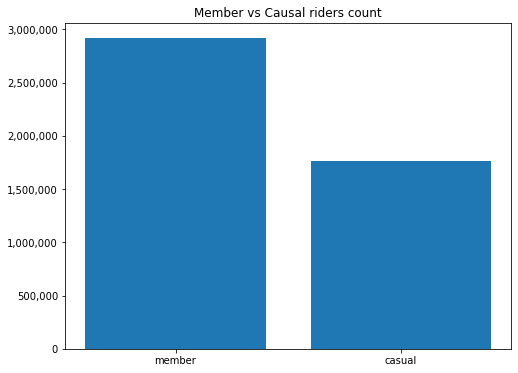

In [302]:
plt.figure(figsize=(8,6))
plt.bar( member_type.index,member_type.values)
plt.title("Member vs Causal riders count")
current_values = plt.gca().get_yticks()
current_values
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

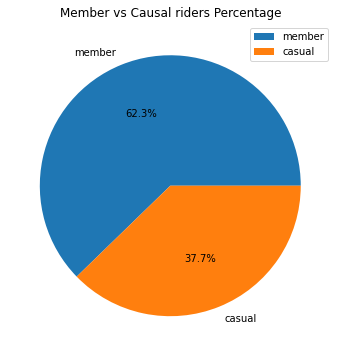

In [303]:
plt.figure(figsize=(8,6))
plt.pie(member_type.values,labels = member_type.index,autopct="%.1f%%")
plt.title("Member vs Causal riders Percentage")
plt.legend()
plt.show()

<ipython-input-304-d95a0d74044b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


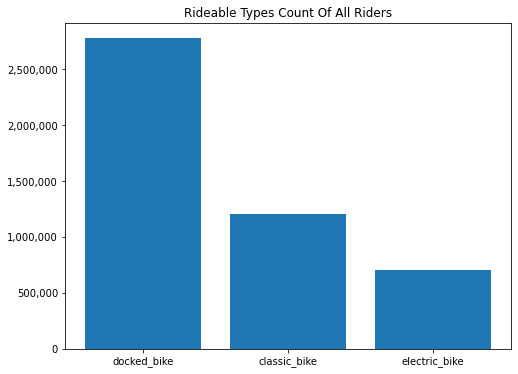

In [304]:
plt.figure(figsize=(8,6))
plt.bar( rideable_type.index,rideable_type.values)
plt.title("Rideable Types Count Of All Riders")
current_values = plt.gca().get_yticks()
current_values
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

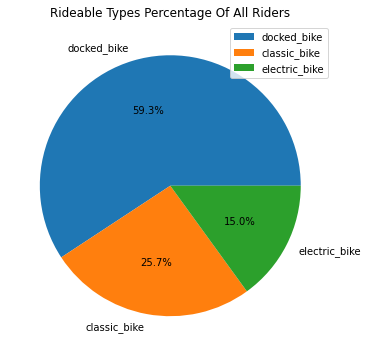

In [305]:
df["rideable_type"].value_counts(normalize= True)
plt.figure(figsize=(8,6))
plt.pie(rideable_type.values,labels = rideable_type.index,autopct="%.1f%%")
plt.title("Rideable Types Percentage Of All Riders")
plt.legend()
plt.show()

<ipython-input-306-884b2153d8f2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


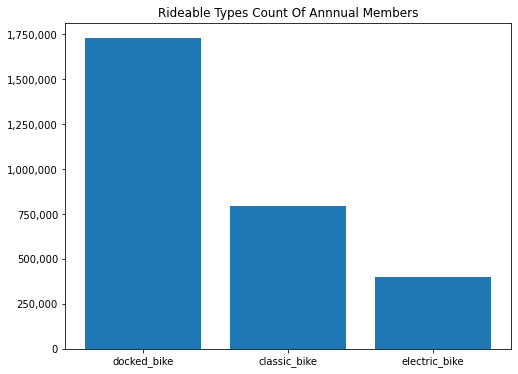

In [306]:
plt.figure(figsize=(8,6))
plt.bar( member_rideable_type.index,member_rideable_type.values)
plt.title("Rideable Types Count Of Annnual Members")
current_values = plt.gca().get_yticks()
current_values
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

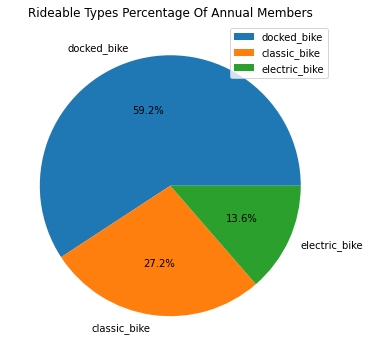

In [307]:
plt.figure(figsize=(8,6))
plt.pie(member_rideable_type.values,labels = member_rideable_type.index,autopct="%.1f%%")
plt.title("Rideable Types Percentage Of Annual Members")
plt.legend()
plt.show()

<ipython-input-308-f9a094b47a64>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


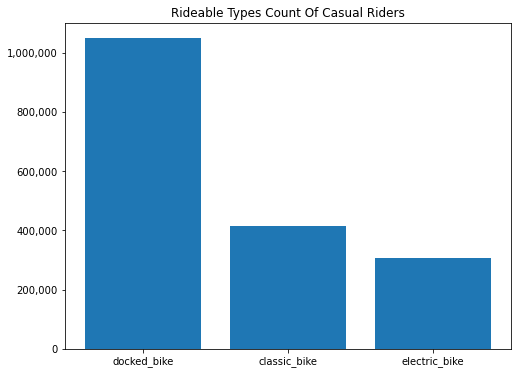

In [308]:
plt.figure(figsize=(8,6))
plt.bar( casual_rideable_type.index,casual_rideable_type.values)
plt.title("Rideable Types Count Of Casual Riders")
current_values = plt.gca().get_yticks()
current_values
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

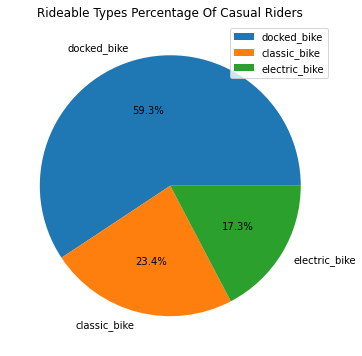

In [309]:
plt.figure(figsize=(8,6))
plt.pie(casual_rideable_type.values,labels = casual_rideable_type.index,autopct="%.1f%%")
plt.title("Rideable Types Percentage Of Casual Riders")
plt.legend()
plt.show()

<ipython-input-310-faa01b647793>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


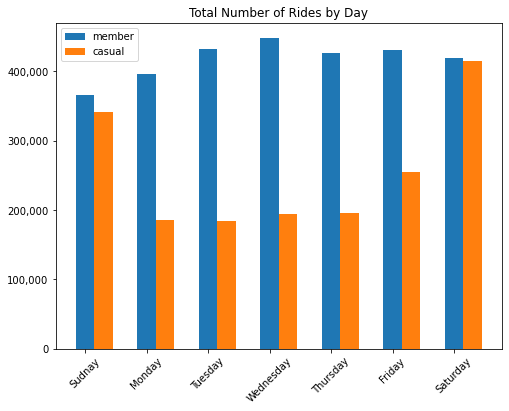

In [310]:
plt.figure(figsize=(8,6))
width = .3
plt.bar(member_day_rides.index,member_day_rides.values,width = width)
plt.bar(casual_day_rides.index+width,casual_day_rides.values,width = width)
plt.title("Total Number of Rides by Day")
plt.xticks([1,2,3,4,5,6,7],labels =["Sudnay","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],rotation = 45)
current_values = plt.gca().get_yticks()
current_values
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(labels = ["member","casual"])
plt.show()

<ipython-input-311-9d50ed3d36be>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


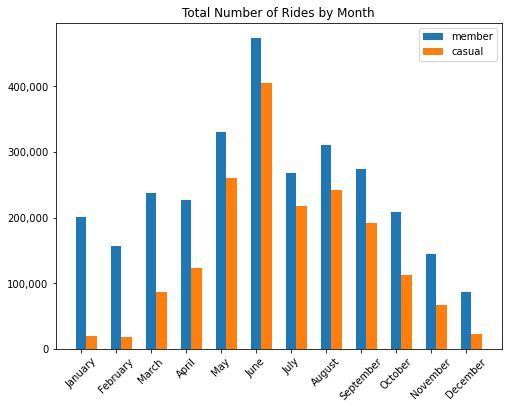

In [311]:
plt.figure(figsize=(8,6))
width = .3
plt.bar(member_month_rides.index,member_month_rides.values,width = width)
plt.bar(casual_month_rides.index+width,casual_month_rides.values,width = width)
plt.title("Total Number of Rides by Month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
           labels =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
          rotation = 45)
current_values = plt.gca().get_yticks()
current_values
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(labels = ["member","casual"])
plt.show()

<AxesSubplot:xlabel='member_casual', ylabel='count'>

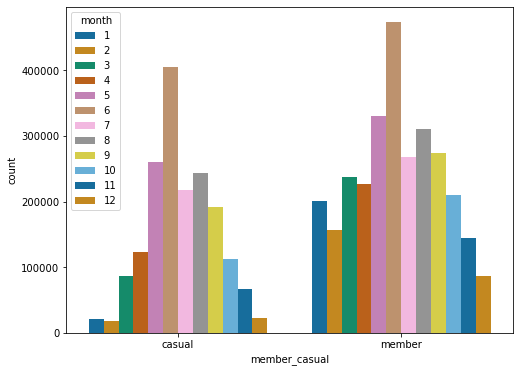

In [312]:
plt.figure(figsize=(8,6))
sns.countplot(x= "member_casual",hue = "month",data = df,palette="colorblind")

## 6.Act

1. the company could lower the charges for the rides for member customers than a casual users. This would encourage to casual users to become regular members.

2. The company can could give discounts for electric and classic bikes to annual and casual riders to increase the use of them

3. The analysis has shown that annual members ride on weekdays more and casual ridres ride more on weekends , So the company should make a weekend packages to only members of the company,this package can include a discount to members who book a bike in the weekend.

4. A little more than 70% of the casual riders use Cyclictic over a span of 5 months from May to September ; Marketing team must focus on top 10 stations during these months for:
- A weekly, monthly and quarterly membership schemes
- Increasing the number of bikes availability over the period of these 5 months

5. Design campaign to promote the usage of bikes regularly by highlighting the health and environmental benefits by creating a mobile application which can show the calories burnt, and have a reward system once a certain level is reached. This will encourage memberships.

Further analysis needs to be carried out to find more insights